In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

## 2.1
For target 'price', I will remove 4 outliers of 'price' and 0s, which contain no information.

In [4]:
df_temp = pd.read_csv('data.csv')
df_temp = df_temp.drop(['date'], axis=1)
#remove outliers of 'price' and 0s, which contain no information.
df = df_temp.loc[(df_temp['price'] != 0) & (df_temp['price'] < 10000000), :]
X = df.iloc[:,1:]
y = pd.DataFrame(df.iloc[:,0])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4599
Data columns (total 17 columns):
price            4549 non-null float64
bedrooms         4549 non-null float64
bathrooms        4549 non-null float64
sqft_living      4549 non-null int64
sqft_lot         4549 non-null int64
floors           4549 non-null float64
waterfront       4549 non-null int64
view             4549 non-null int64
condition        4549 non-null int64
sqft_above       4549 non-null int64
sqft_basement    4549 non-null int64
yr_built         4549 non-null int64
yr_renovated     4549 non-null int64
street           4549 non-null object
city             4549 non-null object
statezip         4549 non-null object
country          4549 non-null object
dtypes: float64(4), int64(9), object(4)
memory usage: 639.7+ KB
None


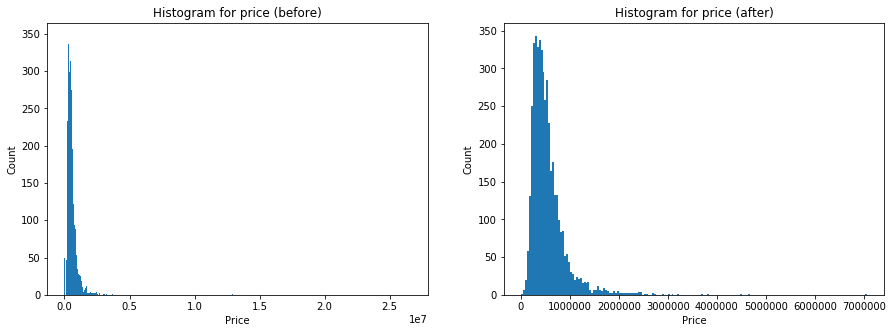

In [5]:
df_temp = pd.read_csv('data.csv')
df_temp = df_temp.drop(['date'], axis=1)

df = df_temp.loc[(df_temp['price'] != 0) & (df_temp['price'] < 10000000), :]
X = df.iloc[:,1:]
y = pd.DataFrame(df.iloc[:,0])
fig1, ax1 = plt.subplots(1, 2, figsize = (15,5))
ax1[0].hist(df_temp['price'], bins='auto');
ax1[0].set_title('Histogram for price (before)')
ax1[0].set_xlabel('Price')
ax1[0].set_ylabel('Count')
ax1[1].hist(y['price'], bins='auto');
ax1[1].set_title('Histogram for price (after)')
ax1[1].set_xlabel('Price')
ax1[1].set_ylabel('Count');

In [6]:
print('Continuous variables: ', list(df.columns[df.dtypes != 'object']))
print('Categorical variables: ', list(df.columns[df.dtypes == 'object']))

Continuous variables:  ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
Categorical variables:  ['street', 'city', 'statezip', 'country']


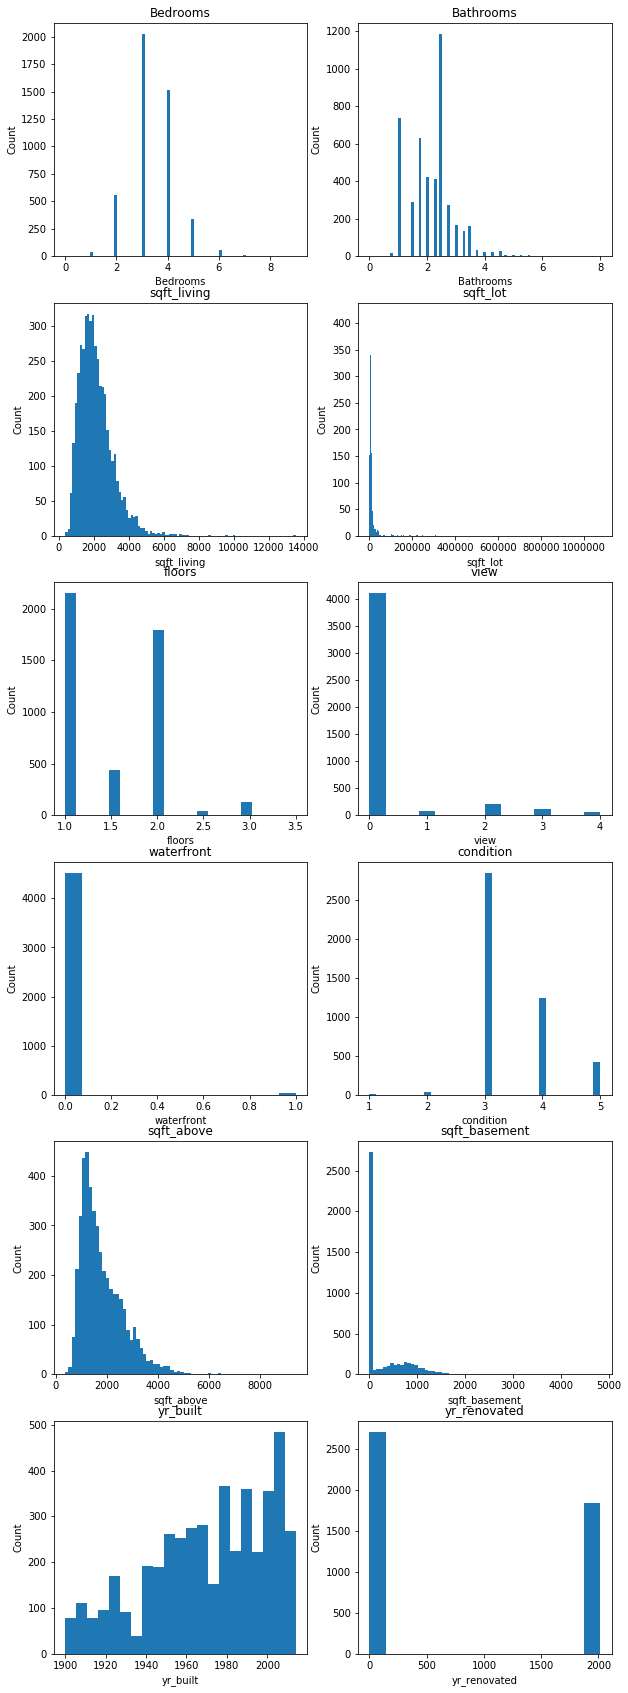

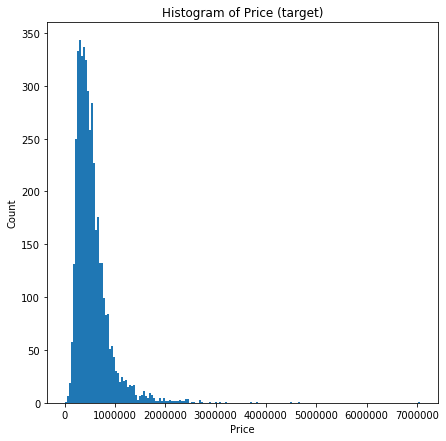

In [7]:
fig, ax = plt.subplots(6, 2, figsize = (10, 30))

ax[0,0].hist(X['bedrooms'], bins = 'auto')
ax[0,0].set_title("Bedrooms") 
ax[0,0].set_xlabel('Bedrooms')
ax[0,0].set_ylabel('Count')

ax[0,1].hist(X['bathrooms'], bins = 'auto')
ax[0,1].set_title("Bathrooms") 
ax[0,1].set_xlabel('Bathrooms')
ax[0,1].set_ylabel('Count')


ax[1,0].hist(X['sqft_living'], bins = 'auto')
ax[1,0].set_title("sqft_living") 
ax[1,0].set_xlabel('sqft_living')
ax[1,0].set_ylabel('Count')

ax[1,1].hist(X['sqft_lot'], bins = 'auto')
ax[1,1].set_title("sqft_lot")
ax[1,1].set_xlabel('sqft_lot')
ax[1,1].set_ylabel('Count')

ax[2,0].hist(X['floors'], bins = 'auto')
ax[2,0].set_title("floors")
ax[2,0].set_xlabel('floors')
ax[2,0].set_ylabel('Count')

ax[2,1].hist(X['view'], bins = 'auto')
ax[2,1].set_title("view")
ax[2,1].set_xlabel('view')
ax[2,1].set_ylabel('Count')

ax[3,0].hist(X['waterfront'], bins = 'auto')
ax[3,0].set_title("waterfront") 
ax[3,0].set_xlabel('waterfront')
ax[3,0].set_ylabel('Count')

ax[3,1].hist(X['condition'], bins = 'auto')
ax[3,1].set_title("condition") 
ax[3,1].set_xlabel('condition')
ax[3,1].set_ylabel('Count')

ax[4,0].hist(X['sqft_above'], bins = 'auto')
ax[4,0].set_title("sqft_above")
ax[4,0].set_xlabel('sqft_above')
ax[4,0].set_ylabel('Count')

ax[4,1].hist(X['sqft_basement'], bins = 'auto')
ax[4,1].set_title("sqft_basement")
ax[4,1].set_xlabel('sqft_basement')
ax[4,1].set_ylabel('Count')

ax[5,0].hist(X['yr_built'], bins = 'auto')
ax[5,0].set_title("yr_built") 
ax[5,0].set_xlabel('yr_built')
ax[5,0].set_ylabel('Count')

ax[5,1].hist(X['yr_renovated'], bins = 'auto')
ax[5,1].set_title("yr_renovated") 
ax[5,1].set_xlabel('yr_renovated')
ax[5,1].set_ylabel('Count');

figa, axa = plt.subplots(1, 1, figsize = (7, 7))
axa.hist(y['price'], bins = 'auto')
axa.set_title("Histogram of Price (target)");
axa.set_xlabel('Price')
axa.set_ylabel('Count');

'sqrt_living', 'sqrt_lot','sqrt_above' and 'price' are heavily right-skewed. I will take log of these values to deal with the skewness. After taking log, the histogram of these columns look like below:

Text(0, 0.5, 'Count')

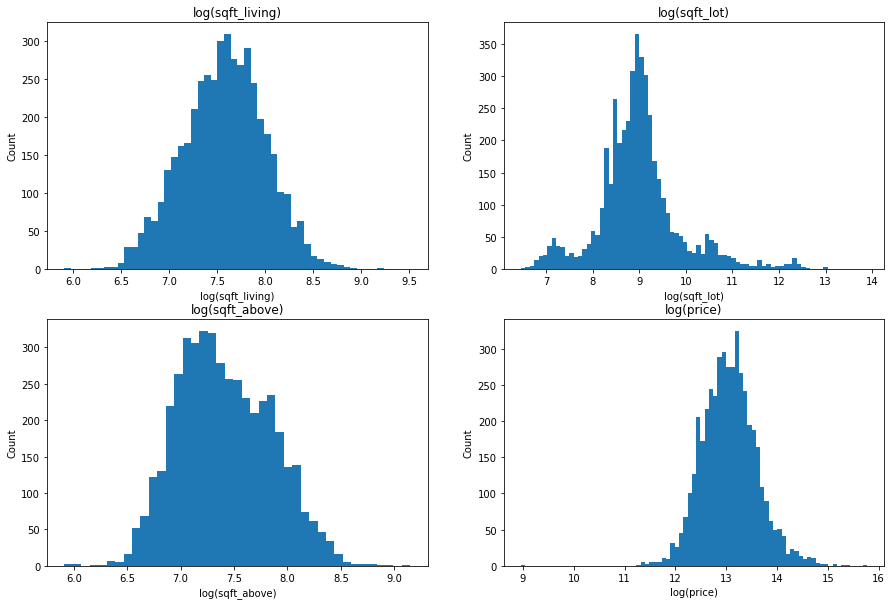

In [9]:
fig2, ax2 = plt.subplots(2, 2, figsize = (15, 10))
ax2[0,0].hist(np.log(X['sqft_living']), bins = 'auto')
ax2[0,0].set_title("log(sqft_living)") 
ax2[0,0].set_xlabel('log(sqft_living)')
ax2[0,0].set_ylabel('Count')

ax2[0,1].hist(np.log(X['sqft_lot']), bins = 'auto')
ax2[0,1].set_title("log(sqft_lot)") 
ax2[0,1].set_xlabel('log(sqft_lot)')
ax2[0,1].set_ylabel('Count')

ax2[1,0].hist(np.log(X['sqft_above']), bins = 'auto')
ax2[1,0].set_title("log(sqft_above)") 
ax2[1,0].set_xlabel('log(sqft_above)')
ax2[1,0].set_ylabel('Count')

ax2[1,1].hist(np.log(y['price']), bins = 'auto');
ax2[1,1].set_title("log(price)") 
ax2[1,1].set_xlabel('log(price)')
ax2[1,1].set_ylabel('Count')

## 2.3

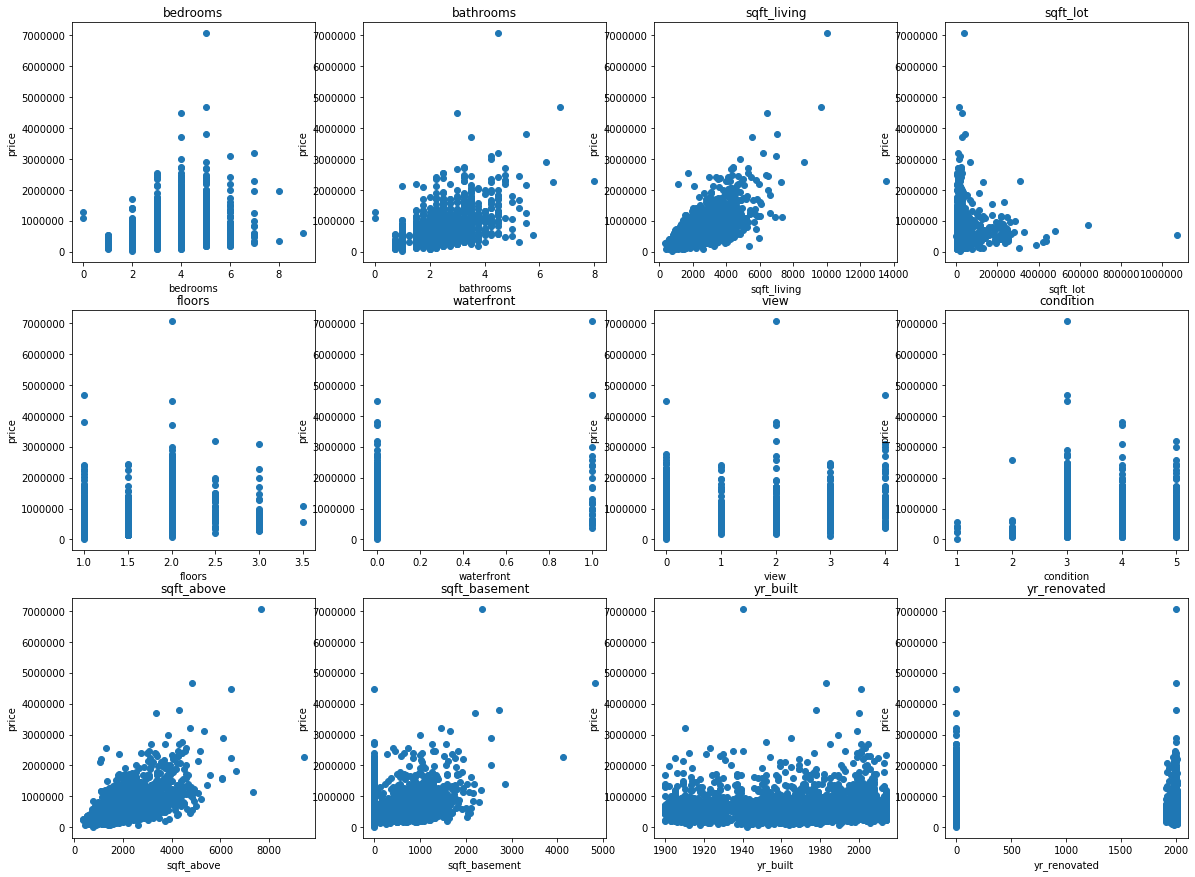

In [10]:
fig3, ax3 = plt.subplots(3, 4, figsize = (20, 15))
cont_var = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'waterfront', 'view', 'condition', 
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

for i in range(12):
    if i<=3:
        ax3[0,i].scatter(X[cont_var[i]], y['price']);
        ax3[0,i].set_title(cont_var[i])
        ax3[0,i].set_xlabel(cont_var[i])
        ax3[0,i].set_ylabel('price')
    elif 4<=i<=7:
        ax3[1,i-4].scatter(X[cont_var[i]], y['price']);
        ax3[1,i-4].set_title(cont_var[i])
        ax3[1,i-4].set_xlabel(cont_var[i])
        ax3[1,i-4].set_ylabel('price')
    else:
        ax3[2,i-8].scatter(X[cont_var[i]], y['price']);
        ax3[2,i-8].set_title(cont_var[i])
        ax3[2,i-8].set_xlabel(cont_var[i])
        ax3[2,i-8].set_ylabel('price')


## 2.4

I will drop columns 'country' and 'street'. Because 'country' only has 'USA', which is not informative; 'street' has too many categories, which is also not so useful in modeling.

In [11]:
X = X.drop(columns=['country', 'street'])
cat_var = ['city', 'statezip']
categorical = X.dtypes == object
continuous = X.dtypes != object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [13]:
pipe_cate = make_pipeline(SimpleImputer(strategy='constant', fill_value='NA'), 
                          OneHotEncoder(handle_unknown='ignore'))

pipe_cont = make_pipeline(StandardScaler(),
                        SimpleImputer())

In [14]:
pre_notscaled = make_column_transformer((pipe_cate, categorical),
                                       (SimpleImputer(), ~categorical))

pre_scaled = make_column_transformer((pipe_cont, ~categorical),
                                    (pipe_cate, categorical))

preprocessor = {'scaled':pre_scaled, 'not scaled': pre_notscaled}

In [15]:
regressor = {'OLS': LinearRegression(),
        'Ridge':Ridge(),
        'Lasso':Lasso(),
        'ElasticNet':ElasticNet()}

for regression_name, regression in regressor.items():
    for preprocess_name, preprocess in preprocessor.items():
        pipe = make_pipeline(preprocess, regression)
        mean_cv_score = np.mean(cross_val_score(pipe, X_train, y_train)).round(5)
        print('The mean cross validation score of {} {} is {}'
              .format(preprocess_name, regression_name,mean_cv_score))

The mean cross validation score of scaled OLS is 0.75218
The mean cross validation score of not scaled OLS is 0.75146
The mean cross validation score of scaled Ridge is 0.75308
The mean cross validation score of not scaled Ridge is 0.50727
The mean cross validation score of scaled Lasso is 0.75223
The mean cross validation score of not scaled Lasso is 0.75223
The mean cross validation score of scaled ElasticNet is 0.57225
The mean cross validation score of not scaled ElasticNet is 0.57121


By comparing mean cross validation score of scaled and non scaled data, we observe that scaling does improve cv score for most of regressions, though some improvements are minor. Note that Lasso does not have any improvement by scaling data.

We will use scaled data for following questions.

## 2.5

In [16]:
##Ridge
param_r = {'ridge__alpha': np.logspace(-4, 4, 9)}
pipe_r =  make_pipeline(pre_scaled, Ridge())
grid_r = GridSearchCV(pipe_r, param_r, cv = 10, 
                      return_train_score = True)
grid_r.fit(X_train, y_train)
print("Ridge: best parameters: ", grid_r.best_params_)
print("Ridge: best mean cross-validation score: ", grid_r.best_score_)

Ridge: best parameters:  {'ridge__alpha': 1.0}
Ridge: best mean cross-validation score:  0.7569730622905126


In [17]:
##Lasso
param_l = {'lasso__alpha':np.logspace(-3, 3, 7)}
pipe_l =  make_pipeline(pre_scaled, Lasso())
grid_l = GridSearchCV(pipe_l, param_l, cv = 10, 
                      return_train_score = True)
grid_l.fit(X_train, y_train)
print("Lasso: best parameters: ", grid_l.best_params_)
print("Lasso: best mean cross-validation score: ", grid_l.best_score_)

Lasso: best parameters:  {'lasso__alpha': 100.0}
Lasso: best mean cross-validation score:  0.7568187591885047


In [18]:
##ElasticNet
param_e = {'elasticnet__alpha':np.logspace(-3, 3, 7),
           'elasticnet__l1_ratio':np.arange(0, 1, 0.2)}
pipe_e =  make_pipeline(pre_scaled, ElasticNet())
grid_e = GridSearchCV(pipe_e, param_e, cv = 10, 
                      return_train_score = True)
grid_e.fit(X_train, y_train)
print("ElasticNet: best parameters: ", grid_e.best_params_)
print("ElasticNet: best mean cross-validation score: ", grid_e.best_score_)

ElasticNet: best parameters:  {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.4}
ElasticNet: best mean cross-validation score:  0.7574611047740805


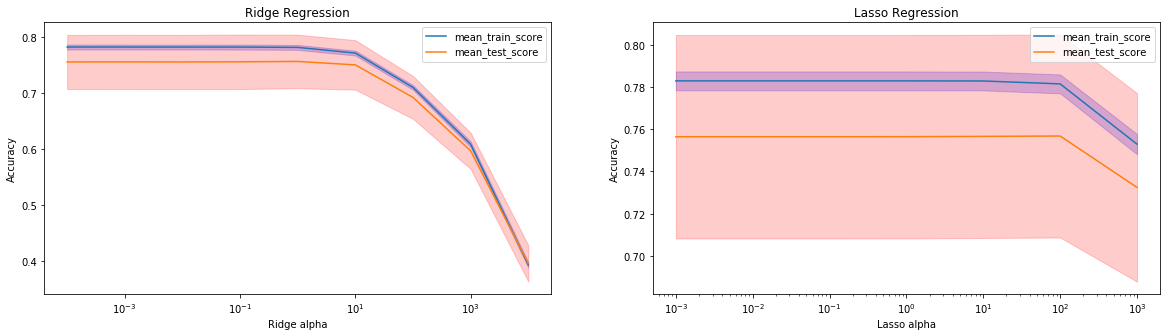

In [19]:
#plot
figg, axx = plt.subplots(1,2, figsize=(20,5))
##Ridge
mean_train_scores_r = grid_r.cv_results_['mean_train_score']
std_train_scores_r  = grid_r.cv_results_['std_train_score']
mean_test_scores_r  = grid_r.cv_results_['mean_test_score']
std_test_scores_r   = grid_r.cv_results_['std_test_score']




axx[0].semilogx(np.logspace(-4, 4, 9), mean_train_scores_r, label = "mean_train_score");

axx[0].fill_between(np.logspace(-4, 4, 9),
                    mean_train_scores_r - std_train_scores_r,
                    mean_train_scores_r + std_train_scores_r,
                    alpha=0.2, color='b');

axx[0].semilogx(np.logspace(-4, 4, 9), mean_test_scores_r , label = "mean_test_score");

axx[0].fill_between(np.logspace(-4, 4, 9),
                       mean_test_scores_r - std_test_scores_r,
                       mean_test_scores_r + std_test_scores_r,
                       alpha=0.2, color='r');
axx[0].legend();
axx[0].set_xlabel('Ridge alpha');
axx[0].set_ylabel('Accuracy');
axx[0].set_title('Ridge Regression');



# LASSO plot
mean_train_scores_l = grid_l.cv_results_['mean_train_score']
std_train_scores_l  = grid_l.cv_results_['std_train_score']
mean_test_scores_l  = grid_l.cv_results_['mean_test_score']
std_test_scores_l   = grid_l.cv_results_['std_test_score']

axx[1].semilogx(np.logspace(-3, 3, 7), mean_train_scores_l, label = "mean_train_score");

axx[1].fill_between(np.logspace(-3, 3, 7),
                    mean_train_scores_l - std_train_scores_l,
                    mean_train_scores_l + std_train_scores_l,
                    alpha=0.2, color='b');

axx[1].semilogx(np.logspace(-3, 3, 7), mean_test_scores_l , label = "mean_test_score");

axx[1].fill_between(np.logspace(-3, 3, 7),
                       mean_test_scores_l - std_test_scores_l,
                       mean_test_scores_l + std_test_scores_l,
                       alpha=0.2, color='r');
axx[1].legend();
axx[1].set_xlabel('Lasso alpha');
axx[1].set_ylabel('Accuracy');
axx[1].set_title('Lasso Regression');


Text(0, 0.5, 'alpha')

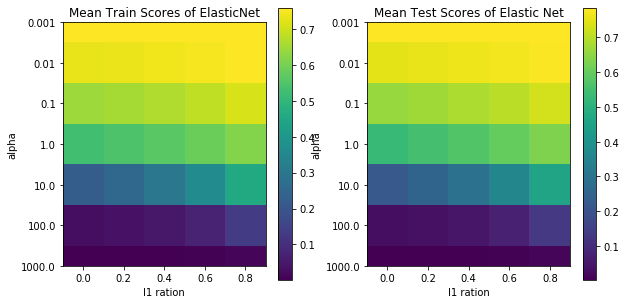

In [20]:
##ElasticNet
df_e=pd.DataFrame(grid_e.cv_results_).loc[:,['param_elasticnet__alpha','param_elasticnet__l1_ratio',
        'mean_test_score','mean_train_score']]
fige, axe = plt.subplots(1,2,figsize=(10,5))
fige.colorbar(axe[0].imshow(np.array(df_e.iloc[:,2]).reshape(7,5)),
              ax=axe[0])
axe[0].set_xticks(np.arange(5))
axe[0].set_xticklabels(np.round(np.arange(0, 1, 0.2),1))
axe[0].set_yticks(np.arange(7))
axe[0].set_yticklabels(np.logspace(-3, 3, 7))
axe[0].set_title('Mean Train Scores of ElasticNet')
axe[0].set_xlabel('l1 ration')
axe[0].set_ylabel('alpha')

fige.colorbar(axe[1].imshow(np.array(df_e.iloc[:,-1]).reshape(7,5)),
              ax=axe[1])
axe[1].set_xticks(np.arange(5))
axe[1].set_xticklabels(np.round(np.arange(0, 1, 0.2),1))
axe[1].set_yticks(np.arange(7))
axe[1].set_yticklabels(np.logspace(-3, 3, 7))
axe[1].set_title('Mean Test Scores of Elastic Net')
axe[1].set_xlabel('l1 ration')
axe[1].set_ylabel('alpha')

## 2.6

Text(0, 0.5, 'Coefficient Name')

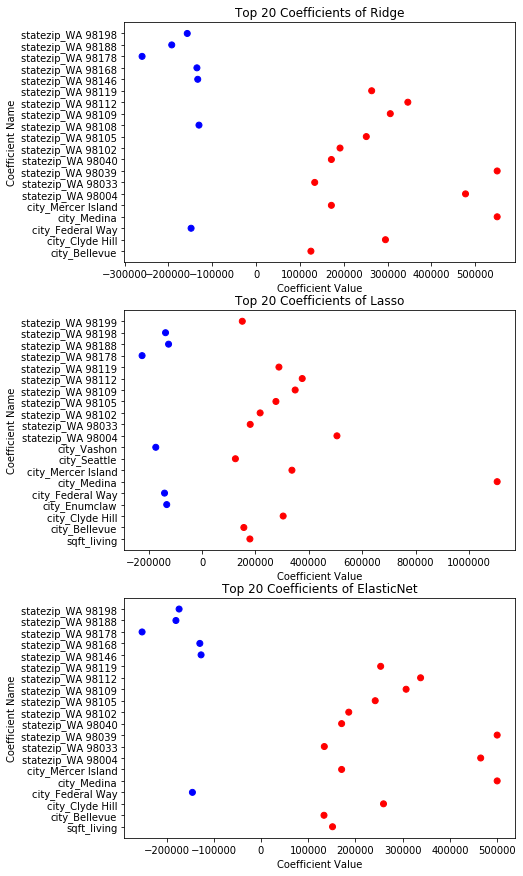

In [92]:
fig26, ax26 = plt.subplots(3, 1, figsize = (7, 15))
columns = pd.get_dummies(X).columns
#Ridge
coef_r = grid_r.best_estimator_[1].coef_[0]
idx_r = np.sort(np.abs(coef_r).argsort()[-20:][::-1])
ax26[0].scatter(coef_r[idx_r],columns[idx_r], c = np.sign(coef_r[idx_r]), cmap='bwr')
ax26[0].set_title('Top 20 Coefficients of Ridge')
ax26[0].set_xlabel('Coefficient Value')
ax26[0].set_ylabel('Coefficient Name')


#Lasso
coef_l = grid_l.best_estimator_[1].coef_
idx_l = np.sort(np.abs(coef_l).argsort()[-20:][::-1])
ax26[1].scatter(coef_l[idx_l],columns[idx_l], c = np.sign(coef_l[idx_l]), cmap='bwr')
ax26[1].set_title('Top 20 Coefficients of Lasso')
ax26[1].set_xlabel('Coefficient Value')
ax26[1].set_ylabel('Coefficient Name')


#ElasticNet
coef_e = grid_e.best_estimator_[1].coef_
idx_e = np.sort(np.abs(coef_e).argsort()[-20:][::-1])
ax26[2].scatter(coef_e[idx_e],columns[idx_e], c = np.sign(coef_e[idx_e]), cmap='bwr')
ax26[2].set_title('Top 20 Coefficients of ElasticNet')
ax26[2].set_xlabel('Coefficient Value')
ax26[2].set_ylabel('Coefficient Name')